<a href="https://colab.research.google.com/github/Shahid-TheMatrixMaker/TitanicSurvivalPrediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Default theme
sns.set_theme(context='notebook',
              style='whitegrid',
              palette='rainbow',
              font='Lucida Calligraphy',
              font_scale=1.5,
              rc=None)
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [ ]:
# import library
import statsmodels.api as sm

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/heptapod/titanic")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: 
Your Kaggle username: 
Your Kaggle username: shahidulislamshahid
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/heptapod/titanic


100%|██████████| 10.8k/10.8k [00:00<00:00, 10.2MB/s]

In [ ]:
import pandas as pd
df = pd.read_csv('/content/titanic/train_and_test2.csv')

In [ ]:
df.head().style.set_properties(
    **{
        'background-color': 'LightBlue',
        'color': 'Black',
        'border-color': 'darkblack'
    })

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.000000,7.250000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.000000,0,0,0
1,2,38.000000,71.283300,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.000000,0,0,1
2,3,26.000000,7.925000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.000000,0,0,1
3,4,35.000000,53.100000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.000000,0,0,1
4,5,35.000000,8.050000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.000000,0,0,0


In [ ]:
print('Shape of Titanic data set is :',df.shape)
print('Size of Titanic data set is  :',df.size)

Shape of Titanic data set is : (1309, 28)
Size of Titanic data set is  : 36652


In [ ]:
df.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

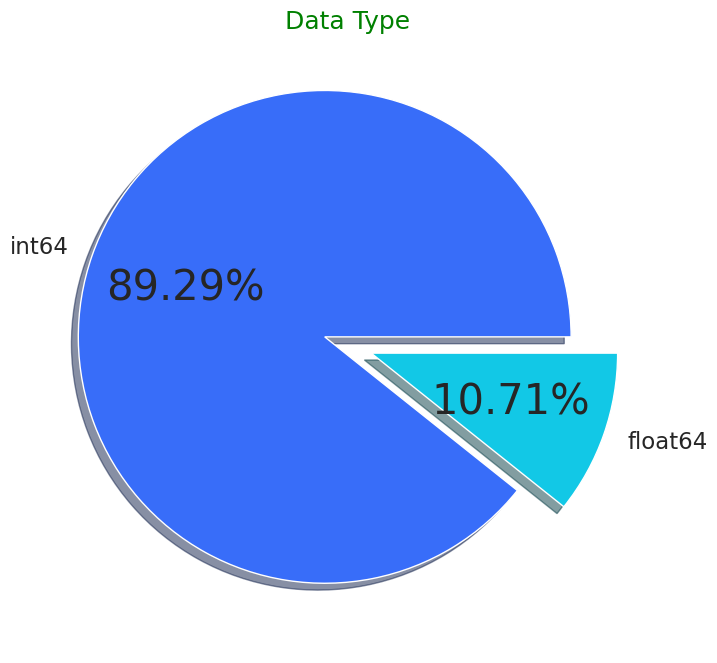

In [ ]:

# Set font size globally
plt.rcParams.update({'font.size': 30})

# Count data types
type_counts = df.dtypes.value_counts()

# Plot pie chart
type_counts.plot.pie(
    explode=[0.1] * len(type_counts),  # Automatically match number of data types
    autopct='%1.2f%%',
    shadow=True
)

# Add title
plt.title(
    'Data Type',
    color='green',
    loc='center',
    fontname='Lucida Calligraphy'  # ✅ Correct key is 'fontname', not 'font'
)

# Make sure it displays
plt.ylabel('')  # Optional: removes 'dtypes' label from pie chart
plt.show()

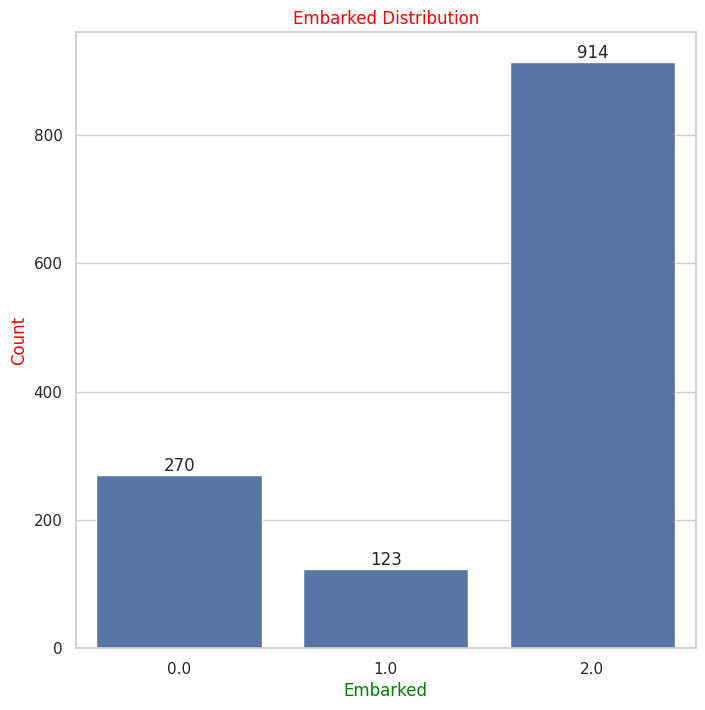

In [ ]:
ax = sns.set(style="whitegrid")
ax = sns.countplot(data=df,x='Embarked');
ax.bar_label(ax.containers[0])

plt.title('Embarked Distribution',color='Red',loc='center',font='Lucida Calligraphy');
plt.xlabel('Embarked',color='Green',loc='center',font='Lucida Calligraphy')
plt.ylabel('Count',color='Red',loc='center',font='Lucida Calligraphy');

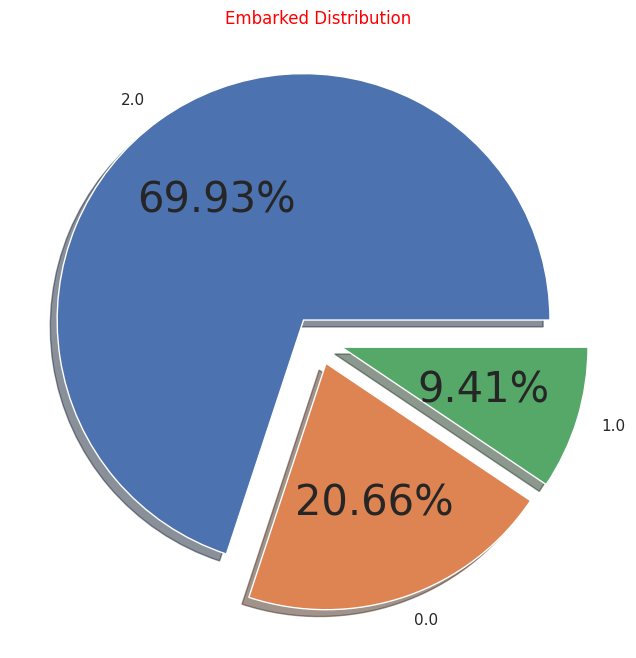

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Example: assuming you have already loaded the Titanic dataset
# titanic = pd.read_csv('titanic.csv')

# Set global font size
plt.rcParams.update({'font.size': 30})

# Count values in 'Embarked'
embarked_counts = df['Embarked'].value_counts()

# Dynamically set explode values based on the number of categories
explode_values = [0.1] * len(embarked_counts)

# Plot pie chart
embarked_counts.plot.pie(
    explode=explode_values,
    autopct='%1.2f%%',
    shadow=True
)

# Add title
plt.title('Embarked Distribution', color='Red', loc='center')

# Optional: Hide y-axis label
plt.ylabel('')

# Show plot
plt.show()


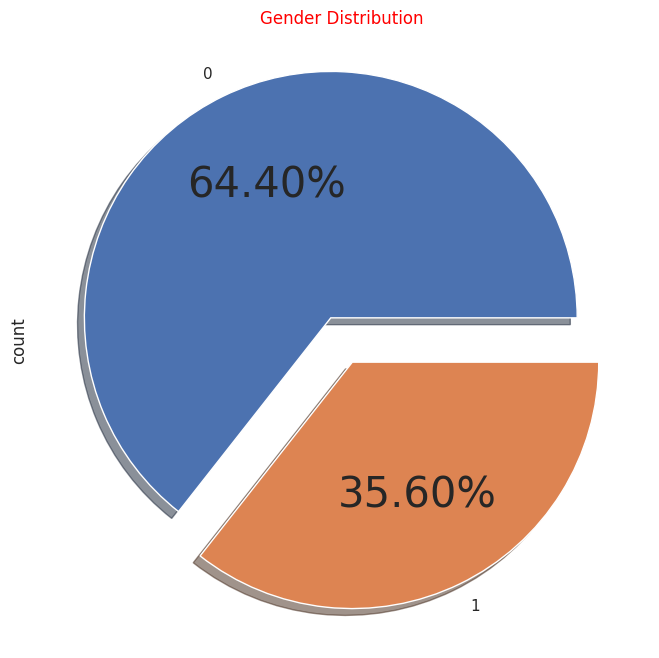

In [ ]:
matplotlib.rcParams.update({'font.size': 30})
df['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Gender Distribution',color='Red',loc='center');

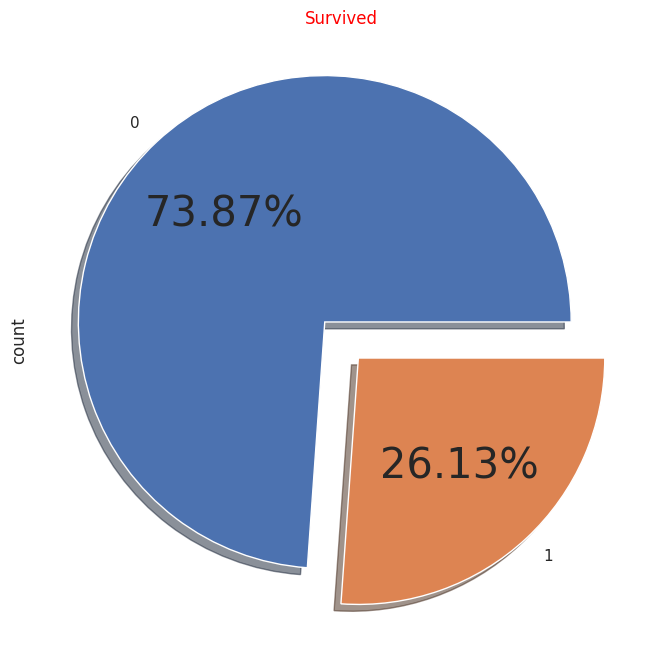

In [ ]:
matplotlib.rcParams.update({'font.size': 30})
df['2urvived'].value_counts().plot.pie(explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Survived',color='Red',loc='center');

In [ ]:
# Show correlation with color + 3-digit precision
df.corr().style.background_gradient(cmap='coolwarm').format(precision=3)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
Passengerid,1.000,0.026,0.031,-0.013,-0.055,nan,nan,nan,nan,nan,nan,nan,0.009,nan,nan,nan,nan,nan,nan,nan,nan,-0.038,nan,nan,-0.052,nan,nan,-0.331
Age,0.026,1.000,0.178,-0.054,-0.190,nan,nan,nan,nan,nan,nan,nan,-0.126,nan,nan,nan,nan,nan,nan,nan,nan,-0.378,nan,nan,-0.065,nan,nan,-0.056
Fare,0.031,0.178,1.000,0.186,0.160,nan,nan,nan,nan,nan,nan,nan,0.222,nan,nan,nan,nan,nan,nan,nan,nan,-0.559,nan,nan,-0.239,nan,nan,0.174
Sex,-0.013,-0.054,0.186,1.000,0.110,nan,nan,nan,nan,nan,nan,nan,0.213,nan,nan,nan,nan,nan,nan,nan,nan,-0.125,nan,nan,-0.099,nan,nan,0.404
sibsp,-0.055,-0.190,0.160,0.110,1.000,nan,nan,nan,nan,nan,nan,nan,0.374,nan,nan,nan,nan,nan,nan,nan,nan,0.061,nan,nan,0.066,nan,nan,-0.014
zero,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
zero.1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
zero.2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
zero.3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
zero.4,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


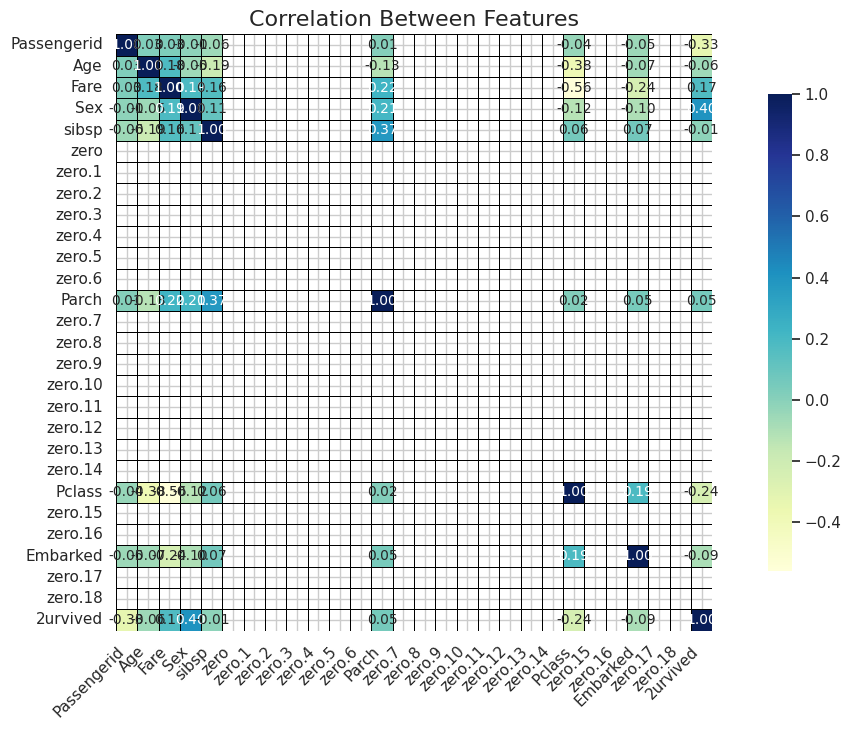

In [ ]:

# Compute correlation
corr = df.corr()

# Plot
plt.figure(figsize=(12, 8))  # Resize to better fit
sns.heatmap(corr,
            annot=True,
            fmt=".2f",               # Two decimal points
            cmap='YlGnBu',
            square=True,
            linewidths=0.5,
            linecolor='black',
            cbar_kws={"shrink": 0.8},  # Smaller color bar
            annot_kws={"size": 10})   # Control font size

plt.title('Correlation Between Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# correlation heatmap of higly correlated features with SalePrice

hig_corr = df.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Fare"]) >= 0.25]
hig_corr_features

Index(['Fare', 'Pclass'], dtype='object')

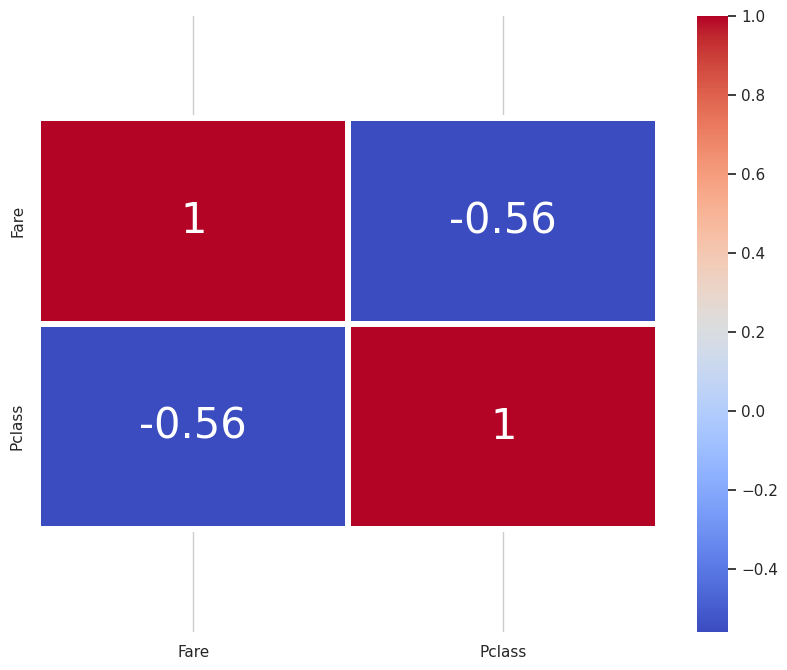

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df[hig_corr_features].corr(), cmap = "coolwarm", annot=True, linewidth=3)
# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

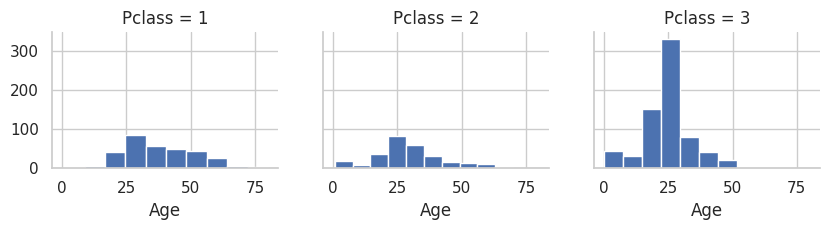

In [ ]:
g = sns.FacetGrid(df, col="Pclass")
g = g.map(plt.hist, "Age")

**Method to find missing values**

In [ ]:
def missing_value (df):
    missing_Number = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) !=0]
    missing_percent=round((df.isnull().sum()/df.isnull().count())*100,2)[round((df.isnull().sum()/df.isnull().count())*100,2) !=0]
    missing = pd.concat([missing_Number,missing_percent],axis=1,keys=['Missing Number','Missing Percentage'])
    return missing

In [ ]:
missing_value(df).style.background_gradient(cmap='coolwarm').format(precision=2)

,Missing Number,Missing Percentage
Embarked,2,0.15


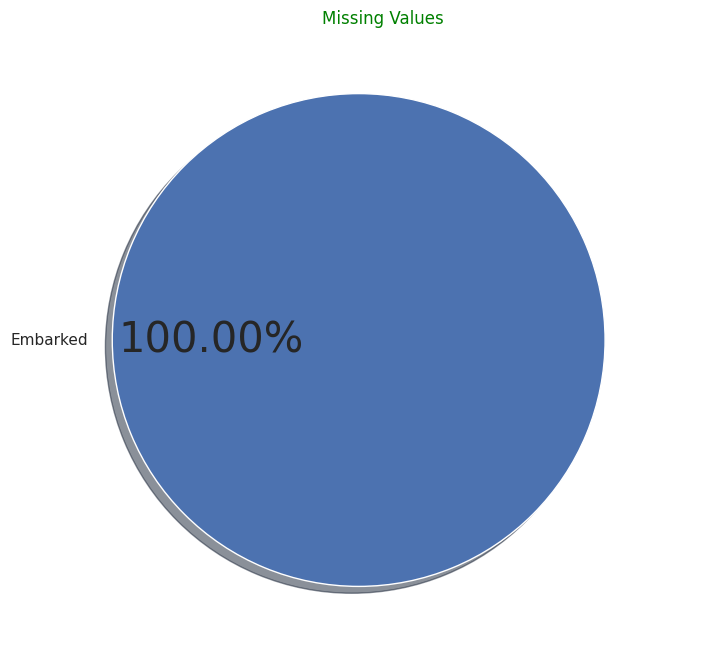

In [ ]:
import matplotlib.pyplot as plt

# Calculate missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)

# Plot
plt.figure(figsize=(8, 8))  # Optional: make chart larger
missing_values.plot.pie(
    explode=[0.1]*len(missing_values),  # explode must match length
    autopct='%1.2f%%',
    shadow=True
)

plt.title('Missing Values',
          color='Green',
          loc='center',
          fontname='Lucida Calligraphy')  # use 'fontname' instead of 'font'

plt.ylabel('')  # remove y-axis label to make it cleaner
plt.show()


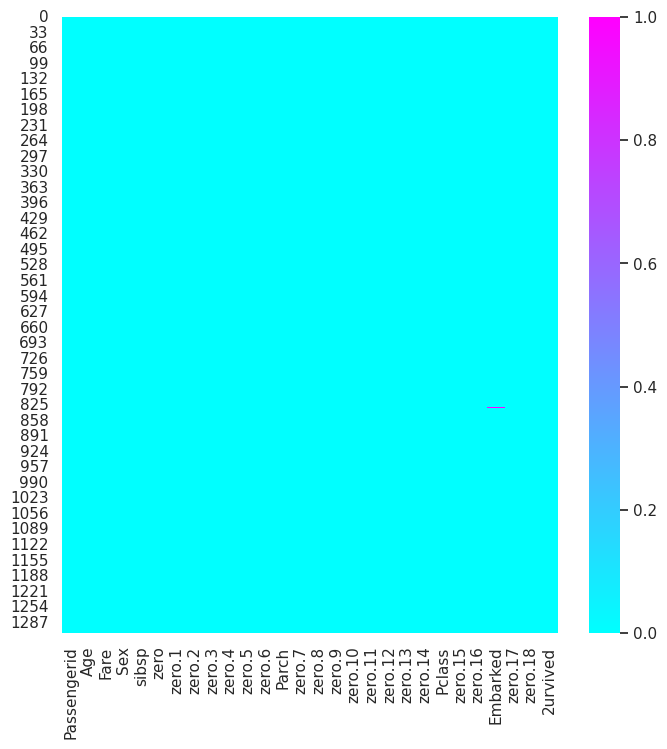

In [ ]:
sns.heatmap(df.isnull(),cmap='cool');

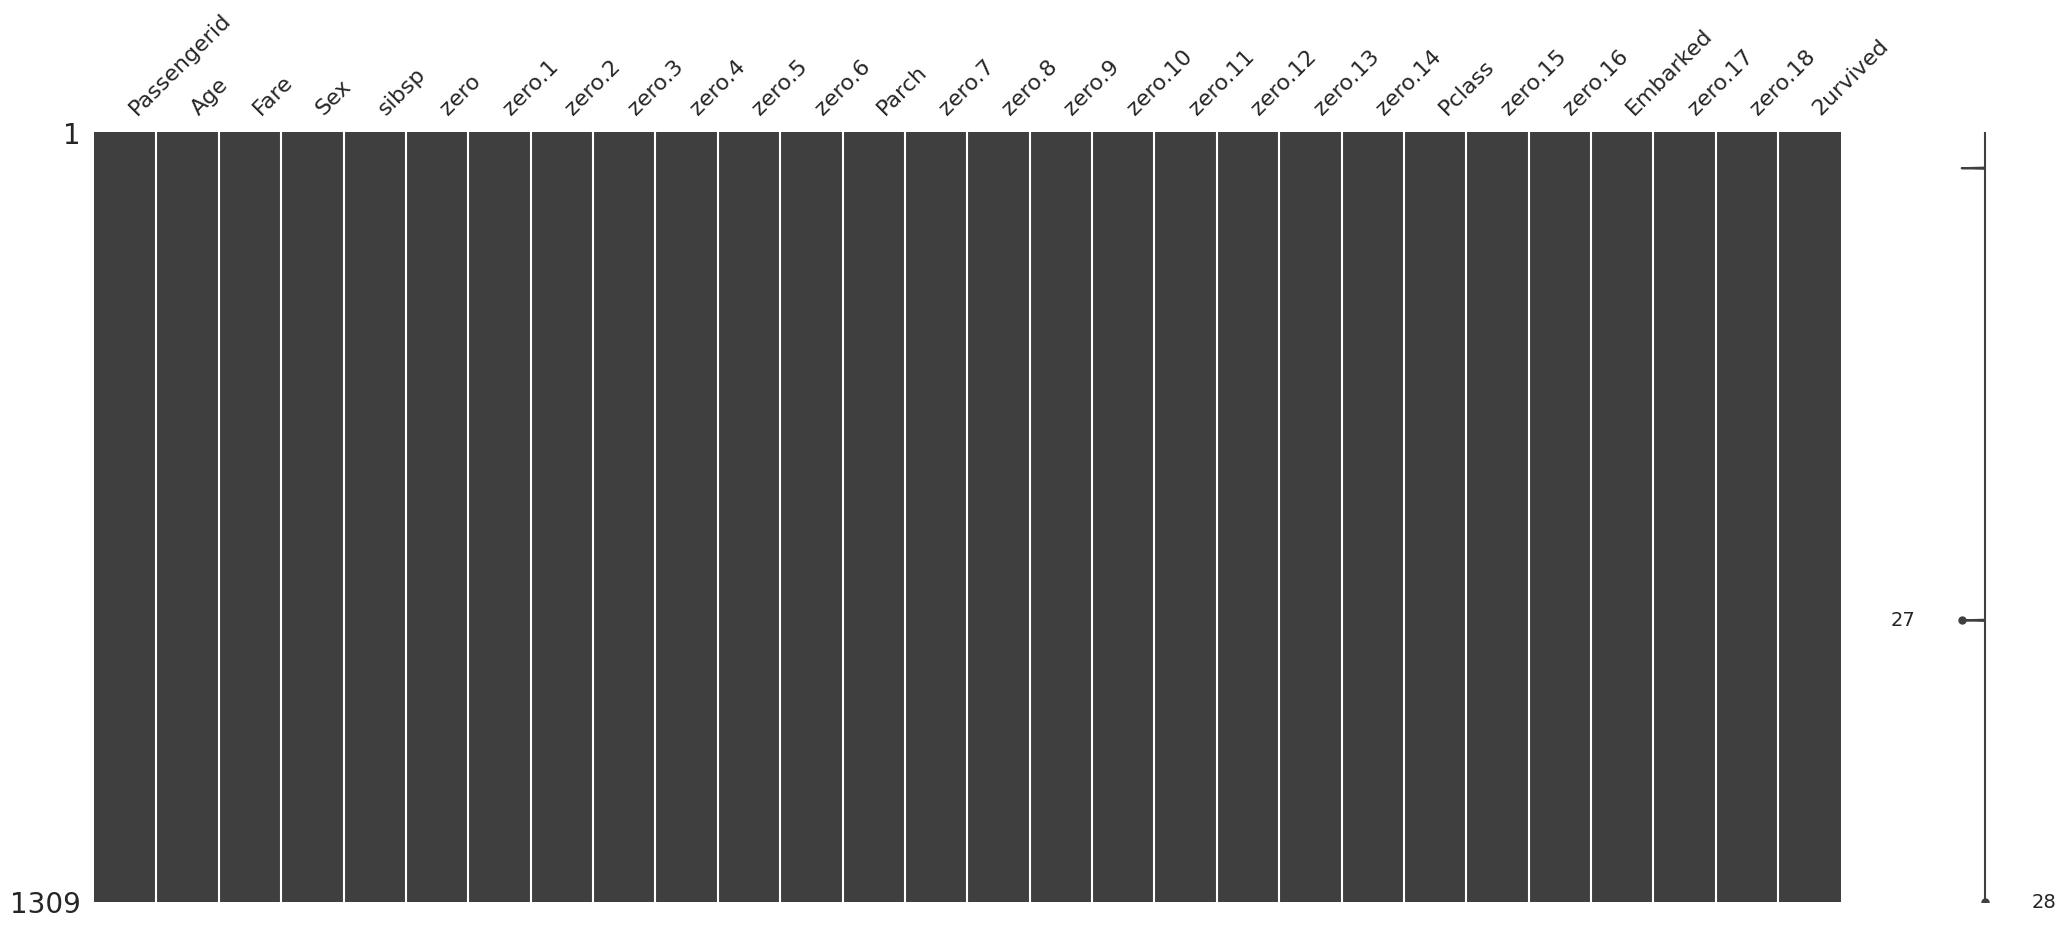

In [ ]:
import missingno as msno
msno.matrix(df)
plt.show()

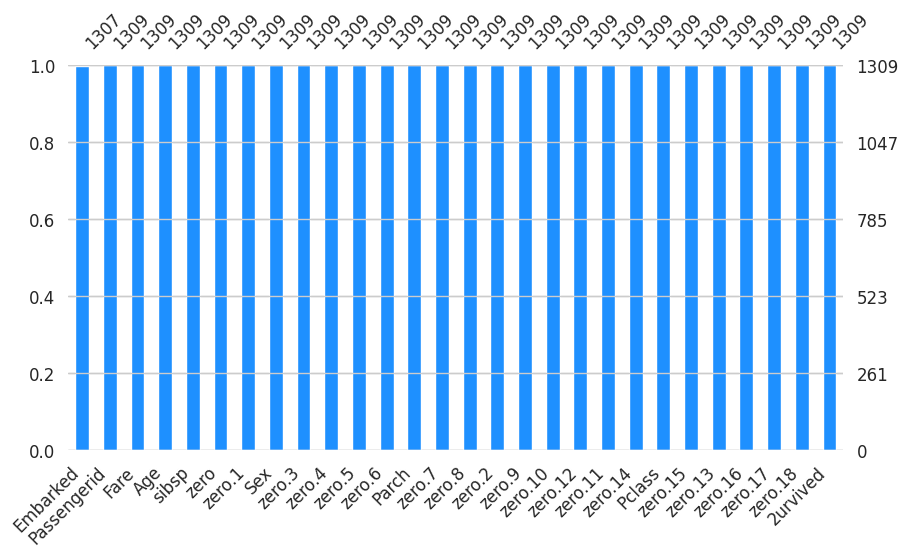

In [ ]:
import missingno
missingno.bar(df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

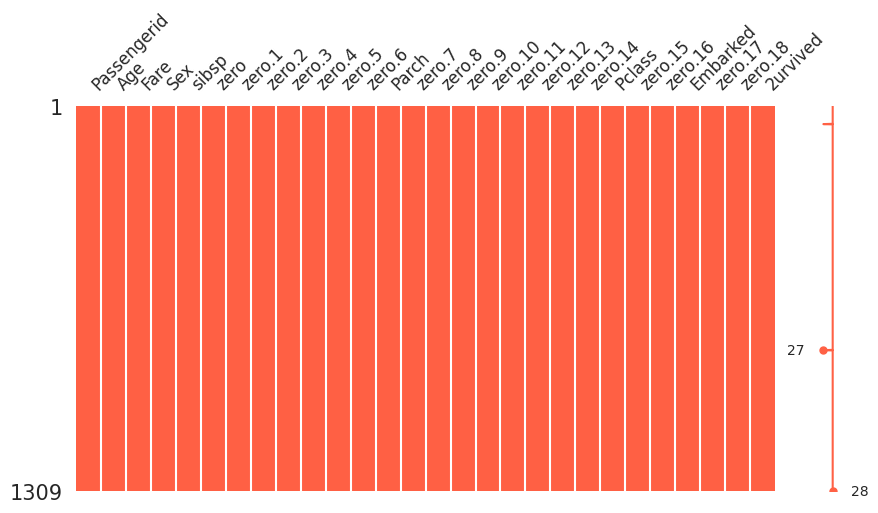

In [ ]:
missingno.matrix(df, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27));

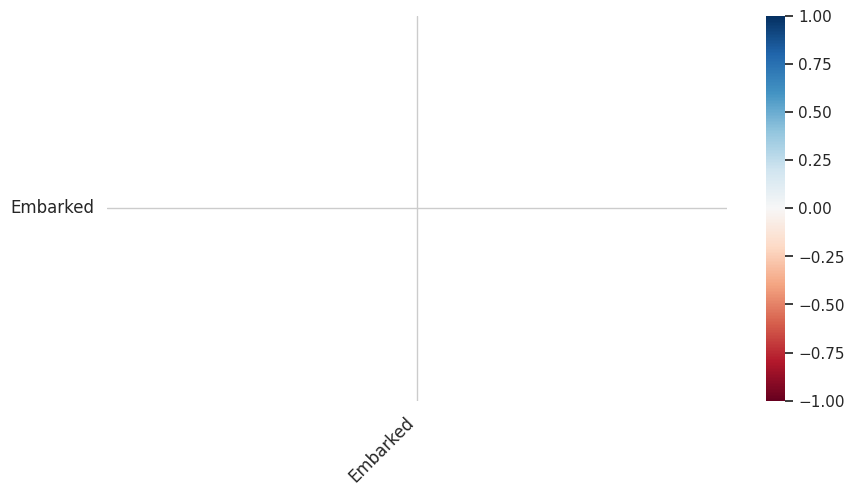

In [ ]:
missingno.heatmap(df, figsize=(10,5), fontsize=12);

Feature Engineering
Filling/Removing Missing Values

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
df[df['Embarked'].isnull()]

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
61,62,38.0,80.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,NaN,0,0,1
829,830,62.0,80.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,NaN,0,0,1


In [ ]:
df['Embarked'] = df['Embarked'].fillna(method='bfill')

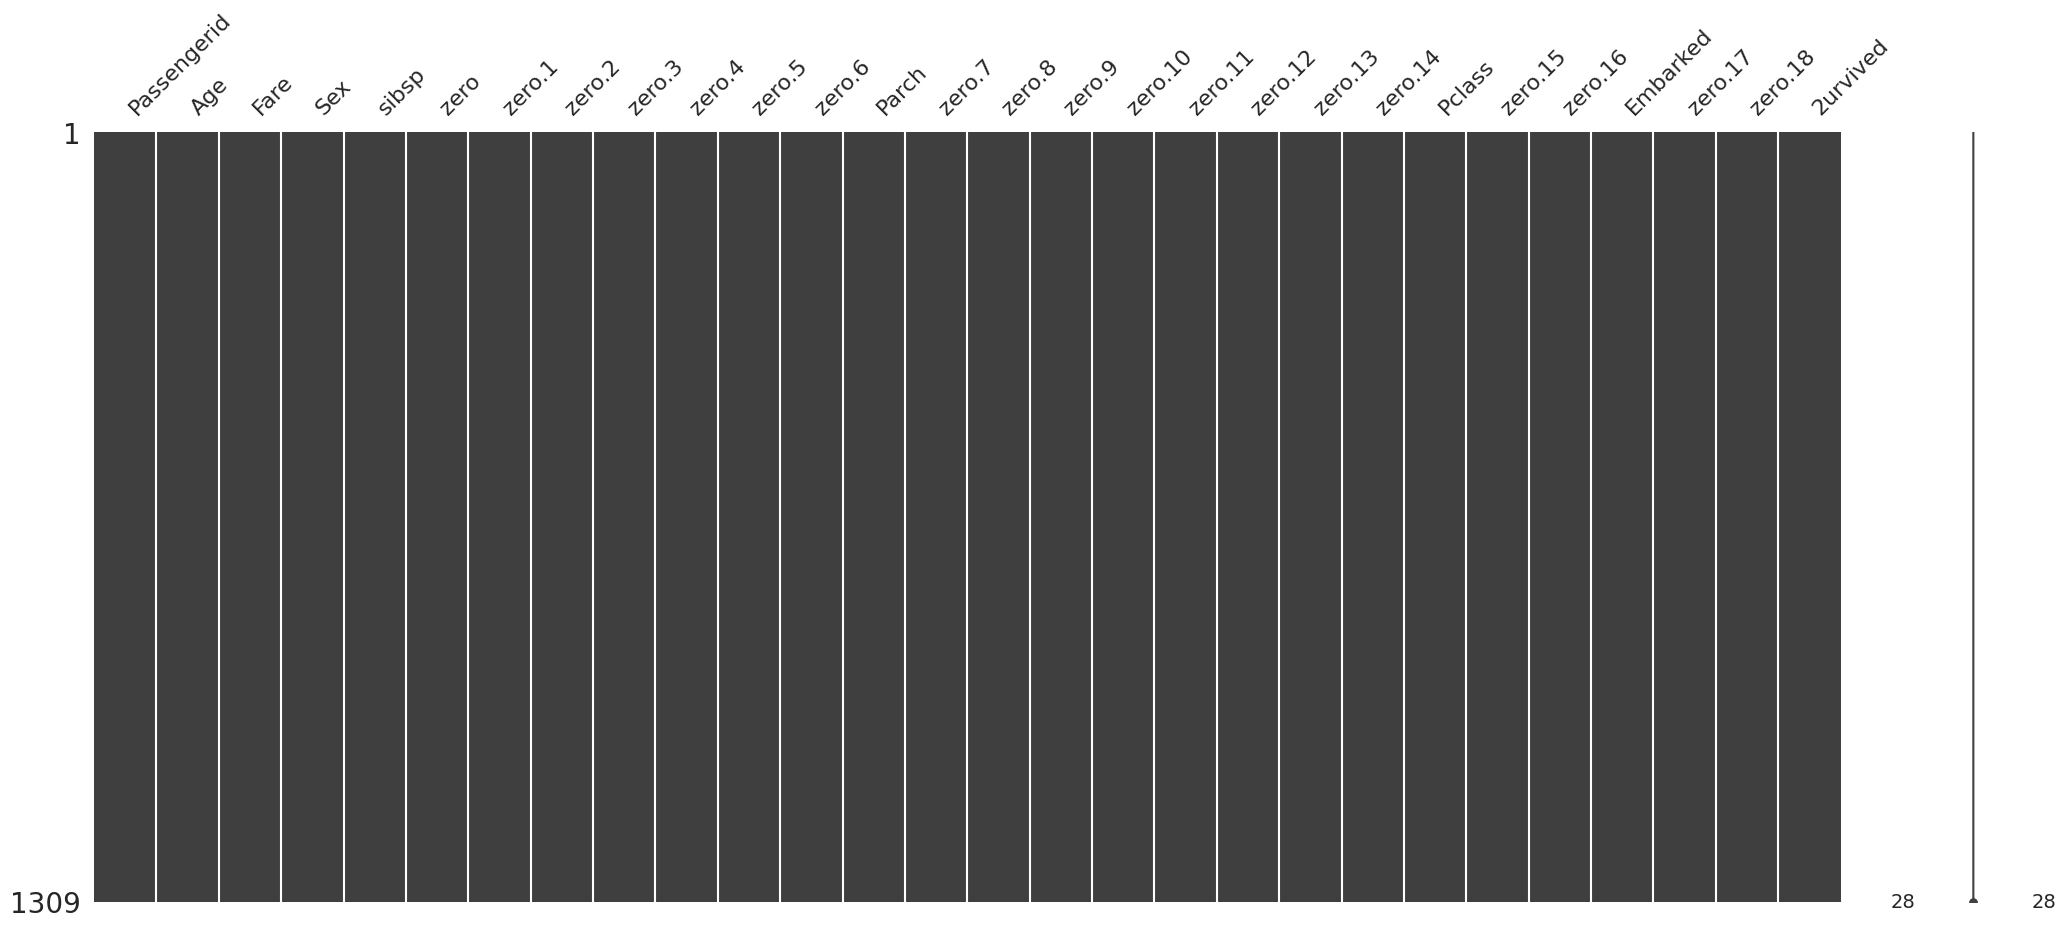

In [ ]:
import missingno as msno
msno.matrix(df)
plt.show()

In [ ]:
df.isnull().sum()

,0
Passengerid,0
Age,0
Fare,0
Sex,0
sibsp,0
zero,0
zero.1,0
zero.2,0
zero.3,0
zero.4,0


All the Missing Value is Filled/**Removed**

In [ ]:
df = df.drop(['zero','zero.17'],axis=1)

In [ ]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero.1,zero.2,zero.3,zero.4,zero.5,...,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,0,3,0,0,2.0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0.0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,0,3,0,0,2.0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,2.0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,2.0,0,0


Categorical feature (Sex & Embarked) is converted into numerical feature by using pandas dummy method

In [ ]:
df = pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)
df.head()

,Passengerid,Age,Fare,sibsp,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,...,zero.13,zero.14,Pclass,zero.15,zero.16,zero.18,2urvived,Sex_1,Embarked_1.0,Embarked_2.0
0,1,22.0,7.2500,1,0,0,0,0,0,0,...,0,0,3,0,0,0,0,False,False,True
1,2,38.0,71.2833,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,True,False,False
2,3,26.0,7.9250,0,0,0,0,0,0,0,...,0,0,3,0,0,0,1,True,False,True
3,4,35.0,53.1000,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,True,False,True
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,False,False,True


Train test split

In [ ]:
X = df.drop(['2urvived'],axis=1)
y = df['2urvived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

**Standardizing the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [ ]:
display(X_train.head())
display(X_test.head())

,Passengerid,Age,Fare,sibsp,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,zero.18,Sex_1,Embarked_1.0,Embarked_2.0
0,0.685144,0.267887,-0.232370,0.465081,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.831717,0.0,0.0,0.0,1.349853,-0.326750,0.645585
1,0.464999,-0.113197,-0.052707,-0.478601,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.577157,0.0,0.0,0.0,-0.740822,-0.326750,-1.548984
2,0.386375,0.267887,0.408016,0.465081,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.577157,0.0,0.0,0.0,1.349853,-0.326750,0.645585
3,-1.448168,-0.113197,-0.161981,0.465081,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.831717,0.0,0.0,0.0,1.349853,3.060447,-1.548984
4,0.184576,-0.113197,-0.637472,-0.478601,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.372720,0.0,0.0,0.0,-0.740822,-0.326750,0.645585


,Passengerid,Age,Fare,sibsp,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,zero.18,Sex_1,Embarked_1.0,Embarked_2.0
0,-0.011982,0.191670,-0.332292,0.465081,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.831717,0.0,0.0,0.0,1.349853,3.060447,-1.548984
1,-1.547757,-1.027798,0.285944,4.239810,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.831717,0.0,0.0,0.0,1.349853,-0.326750,0.645585
2,0.098090,0.953838,-0.486850,-0.478601,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.831717,0.0,0.0,0.0,-0.740822,-0.326750,0.645585
3,0.973429,2.401956,4.528438,0.465081,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.577157,0.0,0.0,0.0,-0.740822,-0.326750,-1.548984
4,-0.766766,-0.418064,0.726978,-0.478601,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.577157,0.0,0.0,0.0,1.349853,-0.326750,-1.548984


**Model Implementation**

# LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy    :",log_train)
print("Model Accuracy Score :",log_accuracy)

Training Accuracy    : 84.15
Model Accuracy Score : 83.59


# Support Vector Machine

In [ ]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",svc_train)
print("Model Accuracy Score  :",svc_accuracy)

Training Accuracy     : 87.97
Model Accuracy Score  : 86.26


# Kneighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",knn_train)
print("Model Accuracy Score  :",knn_accuracy)

Training Accuracy     : 91.5
Model Accuracy Score  : 84.35


# GaussianNB

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)

gaussian_train = round(gaussian.score(X_train, y_train) * 100, 2)
gaussian_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",gaussian_train)
print("Model Accuracy Score  :",gaussian_accuracy)

Training Accuracy     : 82.81
Model Accuracy Score  : 79.77


# Perceptron

In [ ]:
# Perceptron

from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)


perceptron_train = round(perceptron.score(X_train, y_train) * 100, 2)
perceptron_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy    :",perceptron_train)
print("Model Accuracy Score :",perceptron_accuracy)

Training Accuracy    : 80.23
Model Accuracy Score : 78.24


# LinearSVC

In [ ]:
# Linear SVC
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)

linear_svc_train = round(linear_svc.score(X_train, y_train) * 100, 2)
linear_svc_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy    :",linear_svc_train)
print("Model Accuracy Score :",linear_svc_accuracy)

Training Accuracy    : 84.24
Model Accuracy Score : 83.97


# SGD classifier

In [ ]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd_train = round(sgd.score(X_train, y_train) * 100, 2)
sgd_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",sgd_train)
print("Model Accuracy Score  :",sgd_accuracy)

Training Accuracy     : 82.33
Model Accuracy Score  : 83.97


# DecisionTreeClassifier

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
Y_pred = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",decision_train)
print("Model Accuracy Score  :",decision_accuracy)

Training Accuracy     : 100.0
Model Accuracy Score  : 82.44


# RandomForestCLassifier

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",random_forest_train)
print("Model Accuracy Score  :",random_forest_accuracy)

Training Accuracy     : 100.0
Model Accuracy Score  : 85.11


# MLP CLassifier

In [ ]:
# MLPClassifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
Y_pred = mlp.predict(X_test)
mlp.score(X_train, y_train)


mlp_train = round(mlp.score(X_train, y_train) * 100, 2)
mlp_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",mlp_train)
print("Model Accuracy Score  :",mlp_accuracy)

Training Accuracy     : 89.88
Model Accuracy Score  : 85.11


# XGB CLassifier

In [ ]:
import xgboost as Xgb
xgb = Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
Y_pred = xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",xgb_train)
print("Model Accuracy Score  :",xgb_accuracy)

Training Accuracy     : 99.9
Model Accuracy Score  : 84.73


# Comparing models

In [78]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'KNN', 'Logistic Regression',
        'Random Forest',  'Perceptron',
        'Stochastic Gradient Decent', 'Linear SVC', 'Decision Tree',
        'GaussianNB', 'MLPClassifier', 'XGBClassifier'
    ],
    'Training Accuracy': [
        log_train, svc_train, knn_train, gaussian_train, perceptron_train,
        linear_svc_train, sgd_train, decision_train, random_forest_train,
        mlp_train, xgb_train
    ],
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, knn_accuracy, gaussian_accuracy, perceptron_accuracy,
        linear_svc_accuracy, sgd_accuracy, decision_accuracy, random_forest_accuracy,
        mlp_accuracy, xgb_accuracy
    ]
})

In [79]:
models.sort_values(by='Training Accuracy', ascending=False)

,Model,Training Accuracy,Model Accuracy Score
8,GaussianNB,100.00,85.11
7,Decision Tree,100.00,82.44
10,XGBClassifier,99.90,84.73
2,Logistic Regression,91.50,84.35
9,MLPClassifier,89.88,85.11
1,KNN,87.97,86.26
5,Stochastic Gradient Decent,84.24,83.97
0,Support Vector Machines,84.15,83.59
3,Random Forest,82.81,79.77
6,Linear SVC,82.33,83.97


In [81]:
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
    cmap='coolwarm'
).set_properties(**{
    'font-family': 'Lucida Calligraphy',
    'color': 'LightGreen',
    'font-size': '15px'
})


,Model,Training Accuracy,Model Accuracy Score
1,KNN,87.970000,86.260000
8,GaussianNB,100.000000,85.110000
9,MLPClassifier,89.880000,85.110000
10,XGBClassifier,99.900000,84.730000
2,Logistic Regression,91.500000,84.350000
5,Stochastic Gradient Decent,84.240000,83.970000
6,Linear SVC,82.330000,83.970000
0,Support Vector Machines,84.150000,83.590000
7,Decision Tree,100.000000,82.440000
3,Random Forest,82.810000,79.770000


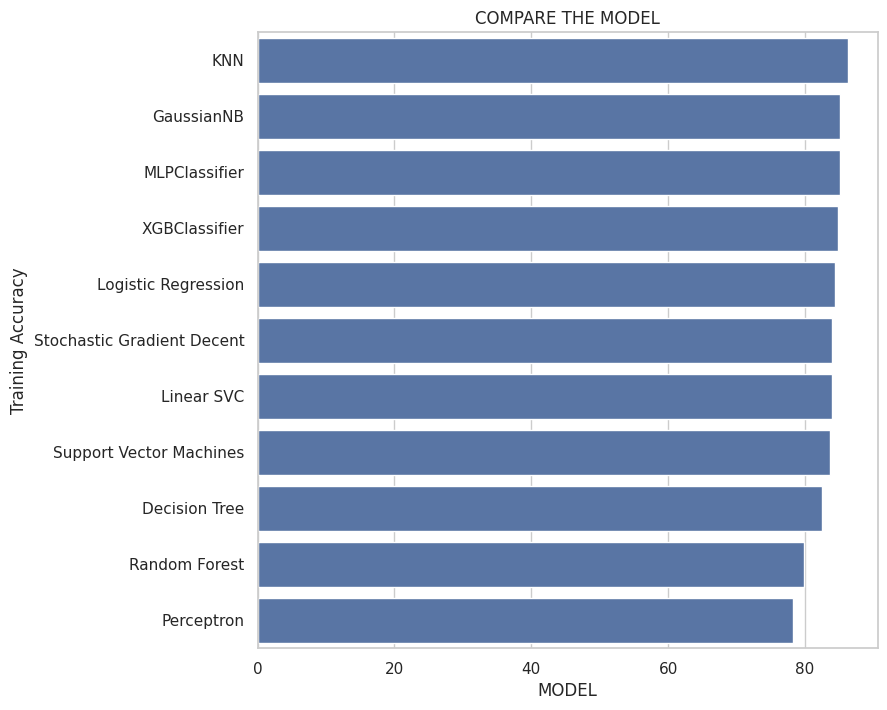

In [82]:
models=models.sort_values(by='Model Accuracy Score',ascending=False)[:20]

sns.barplot(y= 'Model', x= 'Model Accuracy Score', data= models)
plt.title('COMPARE THE MODEL')
plt.xlabel('MODEL')
plt.ylabel('Training Accuracy');

In [88]:
from sklearn.ensemble import RandomForestClassifier

y = df["2urvived"]

features = ["Pclass", "sibsp", "Parch"]
X = pd.get_dummies(df[features])
X_test = pd.get_dummies(df[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)


output = pd.DataFrame({'PassengerId': df.Passengerid, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [89]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>